In [2]:
import pandas as pd
import numpy as np

In [11]:
## Handy function
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [2]:
df = pd.DataFrame(
    [["bar", "one"], ["bar", "two"], ["foo", "one"], ["foo", "two"]],
    columns=["first", "second"],
)
df

,first,second
0,bar,one
1,bar,two
2,foo,one
3,foo,two


In [3]:
index = pd.MultiIndex.from_frame(df)
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('foo', 'one'),
            ('foo', 'two')],
           names=['first', 'second'])

In [4]:
# from cross product
iterables = [["bar", "baz", "foo", "qux"], ["one", "two"]]

index = pd.MultiIndex.from_product(iterables, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [7]:
df = pd.DataFrame(np.random.randn(6, 6), index=index[:6], columns=index[:6])
df

first              bar                 baz                 foo          
second             one       two       one       two       one       two
first second                                                            
bar   one     0.641867 -2.579521  0.348514  2.032945  0.159966 -0.479730
      two    -1.646121 -0.222802 -0.622704 -0.637625  0.043513 -0.101922
baz   one     0.029523  0.822597 -1.116917 -0.738508  1.746885 -0.026149
      two    -1.513246 -2.534802  1.158382  0.961950 -0.720323  0.228854
foo   one    -0.883438 -0.111350  0.300468 -0.776675 -2.177271  0.271697
      two    -0.301867  0.224045  0.892668 -0.315917 -0.249122  0.442806

In [33]:
# will return the row with multi index bar, one
df.loc[('bar','one')]

df.loc['bar','one'] # but this option generates ambiguity

first  second
bar    one       0.641867
       two      -2.579521
baz    one       0.348514
       two       2.032945
foo    one       0.159966
       two      -0.479730
Name: (bar, one), dtype: float64

In [34]:
# returns the row (or rows) with bar label intercept with
# the col (or cols) with bar label
df.loc['bar','bar']

second,one,two
second,,
one,0.641867,-2.579521
two,-1.646121,-0.222802


In [27]:
s = pd.Series(np.random.randn(8), index = index)
s

first  second
bar    one      -0.592254
       two      -1.387922
baz    one      -1.121446
       two       1.092050
foo    one       1.683077
       two       1.879080
qux    one       1.674386
       two       1.170867
dtype: float64

In [20]:
index[:3]

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one')],
           names=['first', 'second'])

In [29]:
s = s.reindex(index[:3])
s

first  second
bar    one      -0.592254
       two      -1.387922
baz    one      -1.121446
dtype: float64

**Note:** `.reindex(<new_index>)` returns a new Series or DataFrames with the indexes
specified in `new_index`. However, if the indeces in `new_index` there are not 
in the previous `index` the values will be filled with NaN. In that way, we could
use `.reindex()` for  filtering columns or rows I think?????

Multiple ways to create multi-index
- list of list
- list of tuples
- cross product between two lists (which within one bigger list)
- using `MultiIndex.from_frame()`
- list of arrays directly to index or columns parameters in a Series or
DataFrame creation

Multindex can be applied or found in both row and column labels

The reason that the MultiIndex matters is that it can allow you to do grouping, selection, and reshaping operations. As you will see in later sections, you can find yourself working with hierarchically-indexed data without creating a MultiIndex explicitly yourself. However, when loading data from a file, you may wish to generate your own MultiIndex when preparing the data set.

 a tuple is interpreted as one multi-level key, a list is used to specify several keys. Or in other words, tuples go horizontally (traversing levels), lists go vertically (scanning levels).

In [41]:
s = pd.Series(
    [1, 2, 3, 4, 5, 6],
    index=pd.MultiIndex.from_product([["A", "B"], ["c", "d", "e"]]),
)
s

A  c    1
   d    2
   e    3
B  c    4
   d    5
   e    6
dtype: int64

In [42]:
s.loc[[("A", "c"), ("B", "d")]]  # list of tuples

A  c    1
B  d    5
dtype: int64

In [43]:
s.loc[(["A","B"],["c","e"])]  # tuple of list

A  c    1
   e    3
B  c    4
   e    6
dtype: int64

Make a picture indicating the levels of index that is mentioned several times in the documentation
Specifically make it for slices() operator

In [39]:
# reset_index() behavior
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': [1, 2, 3, 4, 5, 6, 7, 8],
                   'D': [10, 20, 30, 40, 50, 60, 70, 80]})

df = df.set_index(['A', 'B'])

df

C   D
A   B           
foo one    1  10
bar one    2  20
foo two    3  30
bar three  4  40
foo two    5  50
bar two    6  60
foo one    7  70
    three  8  80

In [40]:
df = df.reset_index()
df

,A,B,C,D
0,foo,one,1,10
1,bar,one,2,20
2,foo,two,3,30
3,bar,three,4,40
4,foo,two,5,50
5,bar,two,6,60
6,foo,one,7,70
7,foo,three,8,80


In [44]:
# order of combinations in a multiple index given by codes parameter
midx = pd.MultiIndex(
    levels=[["zero", "one"], ["x", "y"]], codes=[[1, 1, 0, 0], [1, 0, 1, 0]]
)
midx

# 1, 1, 0, 0 indicates the order of the first level
# zero is in the 0 position in ["zero", "one"]
# one is in the 1 position in ["zero", "one"]
# Then 1, 1, 0, 0 returns the order of labels as
# one
# one
# zero
# zero

# 1, 0, 1, 0 indicates the order of the label "zero" and "one"
# x is in the 0 position in ["x", "y"]
# y is in the 1 position in ["x", "y"]
# Then 1, 0, 1, 0 returns the order of labels as
# y
# x
# y
# x

# both together return
# one y
# one x
# zero y
# zero x


MultiIndex([( 'one', 'y'),
            ( 'one', 'x'),
            ('zero', 'y'),
            ('zero', 'x')],
           )

In [45]:
midx = pd.MultiIndex(
    levels=[["zero", "one"], ["x", "y"]], codes=[[1, 0, 1, 0], [1, 0, 1, 0]]
)
midx

MultiIndex([( 'one', 'y'),
            ('zero', 'x'),
            ( 'one', 'y'),
            ('zero', 'x')],
           )

In [47]:
df = pd.DataFrame(np.random.randn(4, 2), index=midx)
df

,,0,1
one,y,-0.472006,0.503593
zero,x,-1.748592,-1.293128
one,y,0.424005,1.315597
zero,x,-1.252612,0.335079


#### Alignment and Broadcast with `reindex()` or `align()`

In my words, **aligment** is from two DataFrames with different shapes return two 
new DataFrames that share the same shape. This is gotten by completing 
the rows or cols that are missing in each other DataFrame (commonly it is 
completing with NaN values)

In my words, **broadcast** will be repeated a given value along some rows or
cols

In my words, **aligment + broadcasting** will be instead of completing with
NaN values broadcast some values in the missing spaces.


In [48]:
midx = pd.MultiIndex(
    levels=[["zero", "one"], ["x", "y"]], codes=[[1, 1, 0, 0], [1, 0, 1, 0]]
)
df = pd.DataFrame(np.random.randn(4, 2), index=midx)
df

0         1
one  y -0.183850  0.691048
     x  1.223373 -1.808746
zero y  1.137095 -0.347095
     x  1.180646  1.145676

In [49]:
# getting the mean per each index in level 0
df2 = df.groupby(level=0).mean()
df2

,0,1
one,0.519761,-0.558849
zero,1.158870,0.399290


In [53]:
# broadcasting + alingment with reindex
# level = 0 indicates to broadcast the values on level 0
# keeping the df.index shape
df2.reindex(df.index, level=0)

# note you need to reassign to df2 to save the changes

0         1
one  y  0.519761 -0.558849
     x  0.519761 -0.558849
zero y  1.158870  0.399290
     x  1.158870  0.399290

In [54]:
df2

,0,1
one,0.519761,-0.558849
zero,1.158870,0.399290


In [55]:
# alignment + broadcasting using .align()
# level = 0 similarly to the previous case indicates broadcasting along the 
# level 0
df_aligned, df2_aligned = df.align(df2, level=0)
df2_aligned

# TODO: probably I need to explain better align

0         1
one  y  0.519761 -0.558849
     x  0.519761 -0.558849
zero y  1.158870  0.399290
     x  1.158870  0.399290

In [56]:
df_aligned

0         1
one  y -0.183850  0.691048
     x  1.223373 -1.808746
zero y  1.137095 -0.347095
     x  1.180646  1.145676

In [57]:
#swaping levels
df.swaplevel(0, 1, axis=0)

,,0,1
y,one,-0.183850,0.691048
x,one,1.223373,-1.808746
y,zero,1.137095,-0.347095
x,zero,1.180646,1.145676


In [58]:
# reordering level generalizes swaplevel
df.reorder_levels([1,0], axis= 0)


,,0,1
y,one,-0.183850,0.691048
x,one,1.223373,-1.808746
y,zero,1.137095,-0.347095
x,zero,1.180646,1.145676


In [60]:
df

0         1
one  y -0.183850  0.691048
     x  1.223373 -1.808746
zero y  1.137095 -0.347095
     x  1.180646  1.145676

In [59]:
# you can do the same with reindex (I thnink)
# NOOOO -> to use reindex you have to keep into account the order of levels

# REMEMBER: it will be important to have a graph showing the following
# index, columns
# levels,
# axis
# names
new_index = [["y","x"],["one","zero"]]
new_index = pd.MultiIndex(new_index, codes=[[0,1,0,1],[0,0,1,1]])
df.reindex(new_index)

,,0,1
y,one,NaN,NaN
x,one,NaN,NaN
y,zero,NaN,NaN
x,zero,NaN,NaN


## Database-style DataFrame (`join()` and `merge()`)
Pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL. 

## `merge()`

Accepts a left and right `DataFrame` or `named Series` objects

You can use it as 

`pd.merge(df1, df2)` or `df1.merge(df2)`

The related `join()` method, uses merge internally for the index-on-index (by default) and column(s)-on-index join.

In [3]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [5]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [6]:
result = pd.merge(left, right, on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [14]:
result = pd.merge(left, right, on=["key1", "key2"], how="left")
display_side_by_side(left, result)

key1 
 key2 
 A 
 B 
 
 
 
 
 0 
 K0 
 K0 
 A0 
 B0 
 
 
 1 
 K0 
 K1 
 A1 
 B1 
 
 
 2 
 K1 
 K0 
 A2 
 B2 
 
 
 3 
 K2 
 K1 
 A3 
 B3 
 
 
 
 
 
 
 key1 
 key2 
 A 
 B 
 C 
 D 
 
 
 
 
 0 
 K0 
 K0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 K0 
 K1 
 A1 
 B1 
 NaN 
 NaN 
 
 
 2 
 K1 
 K0 
 A2 
 B2 
 C1 
 D1 
 
 
 3 
 K1 
 K0 
 A2 
 B2 
 C2 
 D2 
 
 
 4 
 K2 
 K1 
 A3 
 B3 
 NaN 
 NaN

In [15]:
result = pd.merge(left, right, on=["key1", "key2"], how="right")
display_side_by_side(right, result)

key1 
 key2 
 C 
 D 
 
 
 
 
 0 
 K0 
 K0 
 C0 
 D0 
 
 
 1 
 K1 
 K0 
 C1 
 D1 
 
 
 2 
 K1 
 K0 
 C2 
 D2 
 
 
 3 
 K2 
 K0 
 C3 
 D3 
 
 
 
 
 
 
 key1 
 key2 
 A 
 B 
 C 
 D 
 
 
 
 
 0 
 K0 
 K0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 K1 
 K0 
 A2 
 B2 
 C1 
 D1 
 
 
 2 
 K1 
 K0 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 K2 
 K0 
 NaN 
 NaN 
 C3 
 D3

In [18]:
result = pd.merge(left, right, on=["key1", "key2"], how="outer")
display_side_by_side(left, right, result)

key1 
 key2 
 A 
 B 
 
 
 
 
 0 
 K0 
 K0 
 A0 
 B0 
 
 
 1 
 K0 
 K1 
 A1 
 B1 
 
 
 2 
 K1 
 K0 
 A2 
 B2 
 
 
 3 
 K2 
 K1 
 A3 
 B3 
 
 
 
 
 
 
 key1 
 key2 
 C 
 D 
 
 
 
 
 0 
 K0 
 K0 
 C0 
 D0 
 
 
 1 
 K1 
 K0 
 C1 
 D1 
 
 
 2 
 K1 
 K0 
 C2 
 D2 
 
 
 3 
 K2 
 K0 
 C3 
 D3 
 
 
 
 
 
 
 key1 
 key2 
 A 
 B 
 C 
 D 
 
 
 
 
 0 
 K0 
 K0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 K0 
 K1 
 A1 
 B1 
 NaN 
 NaN 
 
 
 2 
 K1 
 K0 
 A2 
 B2 
 C1 
 D1 
 
 
 3 
 K1 
 K0 
 A2 
 B2 
 C2 
 D2 
 
 
 4 
 K2 
 K1 
 A3 
 B3 
 NaN 
 NaN 
 
 
 5 
 K2 
 K0 
 NaN 
 NaN 
 C3 
 D3

In [20]:
result = pd.merge(left, right, how="cross")
display_side_by_side(left, right, result)

key1 
 key2 
 A 
 B 
 
 
 
 
 0 
 K0 
 K0 
 A0 
 B0 
 
 
 1 
 K0 
 K1 
 A1 
 B1 
 
 
 2 
 K1 
 K0 
 A2 
 B2 
 
 
 3 
 K2 
 K1 
 A3 
 B3 
 
 
 
 
 
 
 key1 
 key2 
 C 
 D 
 
 
 
 
 0 
 K0 
 K0 
 C0 
 D0 
 
 
 1 
 K1 
 K0 
 C1 
 D1 
 
 
 2 
 K1 
 K0 
 C2 
 D2 
 
 
 3 
 K2 
 K0 
 C3 
 D3 
 
 
 
 
 
 
 key1_x 
 key2_x 
 A 
 B 
 key1_y 
 key2_y 
 C 
 D 
 
 
 
 
 0 
 K0 
 K0 
 A0 
 B0 
 K0 
 K0 
 C0 
 D0 
 
 
 1 
 K0 
 K0 
 A0 
 B0 
 K1 
 K0 
 C1 
 D1 
 
 
 2 
 K0 
 K0 
 A0 
 B0 
 K1 
 K0 
 C2 
 D2 
 
 
 3 
 K0 
 K0 
 A0 
 B0 
 K2 
 K0 
 C3 
 D3 
 
 
 4 
 K0 
 K1 
 A1 
 B1 
 K0 
 K0 
 C0 
 D0 
 
 
 5 
 K0 
 K1 
 A1 
 B1 
 K1 
 K0 
 C1 
 D1 
 
 
 6 
 K0 
 K1 
 A1 
 B1 
 K1 
 K0 
 C2 
 D2 
 
 
 7 
 K0 
 K1 
 A1 
 B1 
 K2 
 K0 
 C3 
 D3 
 
 
 8 
 K1 
 K0 
 A2 
 B2 
 K0 
 K0 
 C0 
 D0 
 
 
 9 
 K1 
 K0 
 A2 
 B2 
 K1 
 K0 
 C1 
 D1 
 
 
 10 
 K1 
 K0 
 A2 
 B2 
 K1 
 K0 
 C2 
 D2 
 
 
 11 
 K1 
 K0 
 A2 
 B2 
 K2 
 K0 
 C3 
 D3 
 
 
 12 
 K2 
 K1 
 A3 
 B3 
 K0 
 K0 
 C0 
 D0 
 
 
 13 
 K2 
 K1 
 A3 
 B3 
 K1 
 K0 
 C1 
 D1 
 
 
 14 
 K2 
 K1 
 A3 
 B3 
 K1 
 K0 
 C2 
 D2 
 
 
 15 
 K2 
 K1 
 A3 
 B3 
 K2 
 K0 
 C3 
 D3

In [21]:
ser = pd.Series(
    ["a", "b", "c", "d", "e", "f"],
    index=pd.MultiIndex.from_arrays(
        [["A", "B", "C"] * 2, [1, 2, 3, 4, 5, 6]], names=["Let", "Num"]
    ),
)
ser

Let  Num
A    1      a
B    2      b
C    3      c
A    4      d
B    5      e
C    6      f
dtype: object

In [22]:
ser.reset_index()

,Let,Num,0
0,A,1,a
1,B,2,b
2,C,3,c
3,A,4,d
4,B,5,e
5,C,6,f


**Warning:** Joining / merging on duplicate keys can cause a returned frame that is the multiplication of the row dimensions, which may result in memory overflow. It is the user’ s responsibility to manage duplicate values in keys before joining large DataFrames.

In [24]:
left = pd.DataFrame({"A": [1, 2], "B": [2, 2]})

right = pd.DataFrame({"A": [4, 5, 6], "B": [2, 2, 2]})

result = pd.merge(left, right, on="B", how="outer")

display_side_by_side(left, right, result)

# este ejercicio me hace dudar todo lo que entendi antes

A 
 B 
 
 
 
 
 0 
 1 
 2 
 
 
 1 
 2 
 2 
 
 
 
 
 
 
 A 
 B 
 
 
 
 
 0 
 4 
 2 
 
 
 1 
 5 
 2 
 
 
 2 
 6 
 2 
 
 
 
 
 
 
 A_x 
 B 
 A_y 
 
 
 
 
 0 
 1 
 2 
 4 
 
 
 1 
 1 
 2 
 5 
 
 
 2 
 1 
 2 
 6 
 
 
 3 
 2 
 2 
 4 
 
 
 4 
 2 
 2 
 5 
 
 
 5 
 2 
 2 
 6

In [25]:

result = pd.merge(left, right, on="B", how="inner")

display_side_by_side(left, right, result)

A 
 B 
 
 
 
 
 0 
 1 
 2 
 
 
 1 
 2 
 2 
 
 
 
 
 
 
 A 
 B 
 
 
 
 
 0 
 4 
 2 
 
 
 1 
 5 
 2 
 
 
 2 
 6 
 2 
 
 
 
 
 
 
 A_x 
 B 
 A_y 
 
 
 
 
 0 
 1 
 2 
 4 
 
 
 1 
 1 
 2 
 5 
 
 
 2 
 1 
 2 
 6 
 
 
 3 
 2 
 2 
 4 
 
 
 4 
 2 
 2 
 5 
 
 
 5 
 2 
 2 
 6

If a string matches both a column name and an index level name, then a warning is issued and the column takes precedence. This will result in an ambiguity error in a future version.

**Note**: the non-unique keys problem that I didn't understand happens because
there are overlapping cases where for example

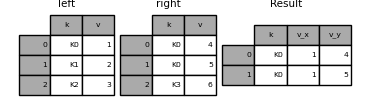

If we want to 'inner' merge using k as key we encounter overlapping in the values
of v because

1. left has K0 1
2. right has K0 3 and K0 4

Then, the overlapping is solve by adding two columns at the resultin merged df
as v_x and v_y

v_x for the left values of column v and v_y for the right values of column v

In [29]:
df1 = pd.DataFrame({"v": [1, 2, 3]}, index=["K0", "K1", "K2"])
df2 = pd.DataFrame({"v": [4, 5, 6]}, index=["K0", "K0", "K3"])
df3 = pd.DataFrame({"v": [7, 8, 9]}, index=["K1", "K1", "K2"])

result = df1.join([df2, df3])

display_side_by_side(df1, df2, df3, result)


,v
K0,1
K1,2
K2,3
,v
K0,4
K0,5
K3,6
,v
K1,7
K1,8


In [31]:
#the idea of combine_first is to have two data frames that are similar in the sense
# that they have same index and columns (not necessarily all of them)
# and you want to "patch" or fill some nan values from left with the values
# from right.

df1 = pd.DataFrame(
    [[np.nan, 3.0, 5.0], [-4.6, np.nan, np.nan], [np.nan, 7.0, np.nan]]
)


df2 = pd.DataFrame([[-42.6, np.nan, -8.2], [-5.0, 1.6, 4]], index=[1, 2])

result = df1.combine_first(df2)

display_side_by_side(df1, df2, result)

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,NaN
2,NaN,7.0,NaN
,0,1,2
1,-42.6,NaN,-8.2
2,-5.0,1.6,4.0
,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,-8.2
2,-5.0,7.0,4.0


In [33]:
# related method that alterate the NaN values in place
# but replace all the values from right into the left structure
df1.update(df2)
df1

,0,1,2
0,NaN,3.0,5.0
1,-42.6,NaN,-8.2
2,-5.0,1.6,4.0
